In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 文本预处理

## 语料清洗

In [0]:
content = ["欢迎来到 深度之眼","Gauss   老师带你入门NLP  "]

In [0]:
import re
def process(line):
  reline = re.sub(r"\s+","",line)
  return reline

In [0]:
list(map(lambda x: process(x),content))

['欢迎来到深度之眼', 'Gauss老师带你入门NLP']

In [0]:
line = "   asdada??123@#$%^&*#$%^&*^%%"
string = re.sub(r"[\s\\/&^*#]","",line)
string

'asdada??123@$%$%%%'

## 分词

jieba分词

In [0]:
!pip install jieba

In [0]:
import jieba
line = "欢迎来到深度之眼，Gauss老师带你入门NLP"
" ".join(jieba.cut(line))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.880 seconds.
Prefix dict has been built succesfully.


'欢迎 来到 深度 之眼 ， Gauss 老师 带 你 入门 NLP'





*   精确模式，试图将句子最精确地切开，适合文本分析；
*   全模式，把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义；
*   搜索引擎模式，在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词。





In [0]:
seg_list = jieba.cut(line, cut_all=True, HMM=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

seg_list = jieba.cut(line, cut_all=False, HMM=True)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

seg_list = jieba.cut_for_search(line,HMM=True)  # 搜索引擎模式
print("Search Mode: " + "/ ".join(seg_list))  

Full Mode: 欢迎/ 迎来/ 来到/ 深度/ 之/ 眼/ / Gauss/ 老师/ 带/ 你/ 入门/ NLP
Default Mode: 欢迎/ 来到/ 深度/ 之眼/ ，/ Gauss/ 老师/ 带/ 你/ 入门/ NLP
Search Mode: 欢迎/ 来到/ 深度/ 之眼/ ，/ Gauss/ 老师/ 带/ 你/ 入门/ NLP


### 调整词典

In [0]:
'/'.join(jieba.cut('如果放到post中将出错。', HMM=True))

'如果/放到/post/中将/出错/。'

In [0]:
jieba.suggest_freq(('中', '将'), True)

494

In [0]:
'/'.join(jieba.cut('如果放到post中将出错。', HMM=True))

'如果/放到/post/中/将/出错/。'

In [0]:
'/'.join(jieba.cut('「台中」正确应该不会被切开', HMM=True))

'「/台/中/」/正确/应该/不会/被/切开'

In [0]:
jieba.suggest_freq('台中', True)

69

In [0]:
'/'.join(jieba.cut('「台中」正确应该不会被切开', HMM=False))

'「/台中/」/正确/应该/不会/被/切开'

### pkuseg 分词

In [0]:
!pip install pkuseg

     |████████████████████████████████| 50.2MB 200kB/s 


In [0]:
import pkuseg
pseg = pkuseg.pkuseg()

In [0]:
line = "「台中」正确应该不会被切开"
"/".join(pseg.cut(line))

'「/台中/」/正确/应该/不/会/被/切开'

## 去停用词

下载停用词表

In [21]:
!git clone https://github.com/goto456/stopwords.git

fatal: destination path 'stopwords' already exists and is not an empty directory.


加载停用词表

In [0]:
stop_word = [line.strip() for line in open('/content/stopwords/中文停用词表.txt').readlines() ]

In [25]:
stop_word[:5]

['$', '0', '1', '2', '3']

In [0]:
import jieba


In [0]:
content = """2018年人工智能的发展在运算智能和感知智能已经取得了很大的突破和优于人类的表现。而在以理解人类语言为入口的认知智能上，目前达观数据自然语言处理技术已经可以实现文档自动解析、关键信息提取、文本分类审核、文本智能纠错等一定基础性的文字处理工作，并在各行各业得到充分应用。


自然语言处理一直是人工智能领域的重要话题，而人类语言的复杂性也给 NLP 布下了重重困难等待解决。长文本的智能解析就是颇具挑战性的任务，如何从纷繁多变、信息量庞杂的冗长文本中获取关键信息，一直是文本领域难题。随着深度学习的热潮来临，有许多新方法来到了 NLP 领域，给相关任务带来了更多优秀成果，也给大家带来了更多应用和想象的空间。


此次比赛，达观数据提供了一批长文本数据和分类信息，希望选手动用自己的智慧，结合当下最先进的NLP和人工智能技术，深入分析文本内在结构和语义信息，构建文本分类模型，实现精准分类。未来文本自动化处理的技术突破和应用落地需要人工智能从业者和爱好者的共同努力，相信文本智能处理技术因为你的算法，变得更加智能！
"""

In [0]:
content_cut = jieba.cut(content)
#" ".join(content_cut)

In [28]:
content_cut

<generator object Tokenizer.cut at 0x7f2e5ac004c0>

In [29]:
final_content = ''
for word in list(content_cut):
    #去停用词
    if word not in stop_word:
      final_content += ' '+ word 

final_content

' 2018 年 人工智能 发展 运算 智能 感知 智能 已经 取得 很大 突破 优于 人类 表现 理解 人类 语言 入口 认知 智能 目前 达观 数据 自然语言 处理 技术 已经 实现 文档 自动 解析 关键 信息提取 文本 分类 审核 文本 智能 纠错 一定 基础性 文字处理 工作 各行各业 得到 充分 应用 \n \n \n 自然语言 处理 一直 人工智能 领域 重要 话题 人类 语言 复杂性   NLP   布下 重重困难 等待 解决 长 文本 智能 解析 颇具 挑战性 任务 纷繁 多变 信息量 庞杂 冗长 文本 中 获取 关键 信息 一直 文本 领域 难题 深度 学习 热潮 来临 新 方法 来到   NLP   领域 相关 任务 带来 更 优秀成果 带来 更 应用 想象 空间 \n \n \n 比赛 达观 数据 提供 一批 长 文本 数据 分类 信息 希望 选手 动用 智慧 结合 当下 先进 NLP 人工智能 技术 深入分析 文本 内在 结构 语义 信息 构建 文本 分类 模型 实现 精准 分类 未来 文本 自动化 处理 技术 突破 应用 落地 需要 人工智能 从业者 爱好者 共同努力 相信 文本 智能 处理 技术 算法 变得 更加 智能 \n'

## 总结

文本预处理里面的学问还很大，其实在NLP里面文本预处理大约可以占到整个项目的50%。


# 数据分析

## 读取数据

In [30]:
!ls drive/My\ Drive/Daguan

test_set.csv  train_set.csv


In [0]:
import pandas as pd

In [0]:
train = pd.read_csv("/content/drive/My Drive/Daguan/train_set.csv",delimiter=',')

In [33]:
train.head()

,id,article,word_seg,class
0,0,7368 1252069 365865 755561 1044285 129532 1053...,816903 597526 520477 1179558 1033823 758724 63...,14
1,1,581131 165432 7368 957317 1197553 570900 33659...,90540 816903 441039 816903 569138 816903 10343...,3
2,2,7368 87936 40494 490286 856005 641588 145611 1...,816903 1012629 957974 1033823 328210 947200 65...,12
3,3,299237 760651 299237 887082 159592 556634 7489...,563568 1239563 680125 780219 782805 1033823 19...,13
4,4,7368 7368 7368 865510 7368 396966 995243 37685...,816903 816903 816903 139132 816903 312320 1103...,12


In [0]:
test = pd.read_csv("/content/drive/My Drive/Daguan/test_set.csv",delimiter=',',nrows=10000)

NameError: ignored

In [0]:
test.head()

,id,article,word_seg
0,0,7368 146447 316564 42610 55736 297797 93042 53...,816903 565958 726082 764656 335008 75094 20282...
1,1,985531 473628 1044285 1121849 206763 462208 11...,729468 520477 529032 101368 335130 520477 1113...
2,2,7368 7368 7368 7368 7368 7368 7368 7368 7368 7...,816903 816903 816903 816903 816903 816903 8169...
3,3,529819 1226459 856005 1177293 663773 272235 93...,231664 1033823 524850 330478 507199 520477 618...
4,4,42610 1252069 1077049 955883 1125260 1044285 2...,545370 379223 162767 520477 1194630 1197475 11...


## 字和词的区别

In [0]:
import jieba

In [35]:
" ".join(jieba.cut("欢迎大家来到深度之眼"))

'欢迎 大家 来到 深度 之眼'

In [36]:
" ".join("欢迎大家来到深度之眼")

'欢 迎 大 家 来 到 深 度 之 眼'

## 训练集文本的长度

### 词粒度的文本长度

In [0]:
train['word_length'] = train["word_seg"].map(lambda x: len(x.split(" ")) )

In [38]:
train.head()

,id,article,word_seg,class,word_length
0,0,7368 1252069 365865 755561 1044285 129532 1053...,816903 597526 520477 1179558 1033823 758724 63...,14,627
1,1,581131 165432 7368 957317 1197553 570900 33659...,90540 816903 441039 816903 569138 816903 10343...,3,3062
2,2,7368 87936 40494 490286 856005 641588 145611 1...,816903 1012629 957974 1033823 328210 947200 65...,12,1588
3,3,299237 760651 299237 887082 159592 556634 7489...,563568 1239563 680125 780219 782805 1033823 19...,13,467
4,4,7368 7368 7368 865510 7368 396966 995243 37685...,816903 816903 816903 139132 816903 312320 1103...,12,1297


### 画图展示

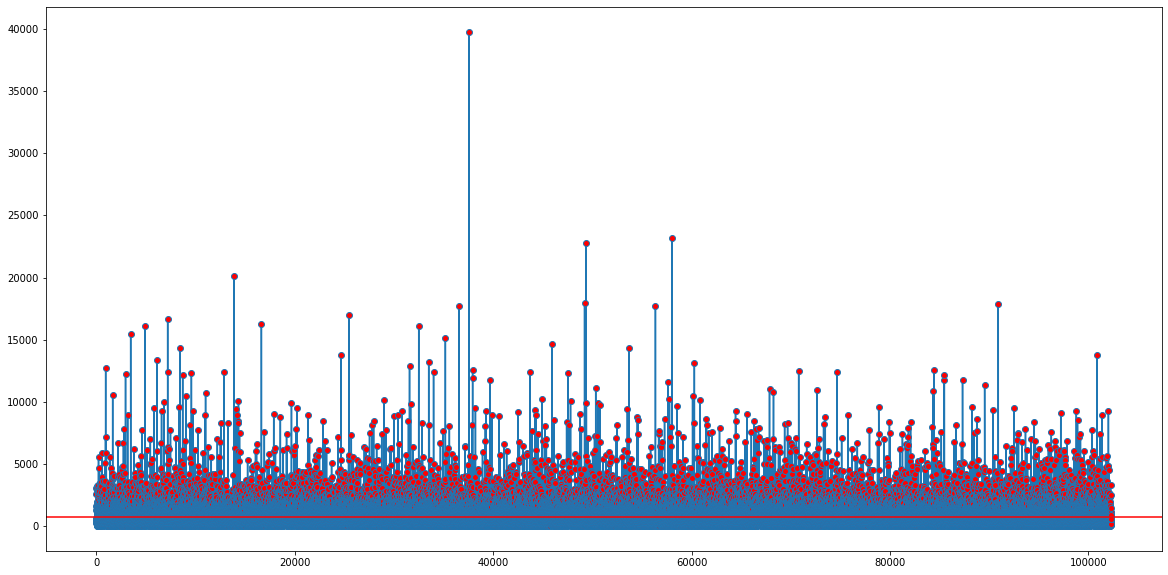

In [39]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(train['word_length'].tolist(),marker='o',markerfacecolor='red')
plt.axhline(y=np.mean(train['word_length'].tolist()),color="red")

In [40]:
train[['word_length']].describe()

,word_length
count,102277.000000
mean,716.954604
std,801.804540
min,6.000000
25%,305.000000
50%,514.000000
75%,862.000000
max,39759.000000


### 字粒度文本的长度

In [0]:
train['char_length'] = train["article"].map(lambda x: len(x.split(" ")) )

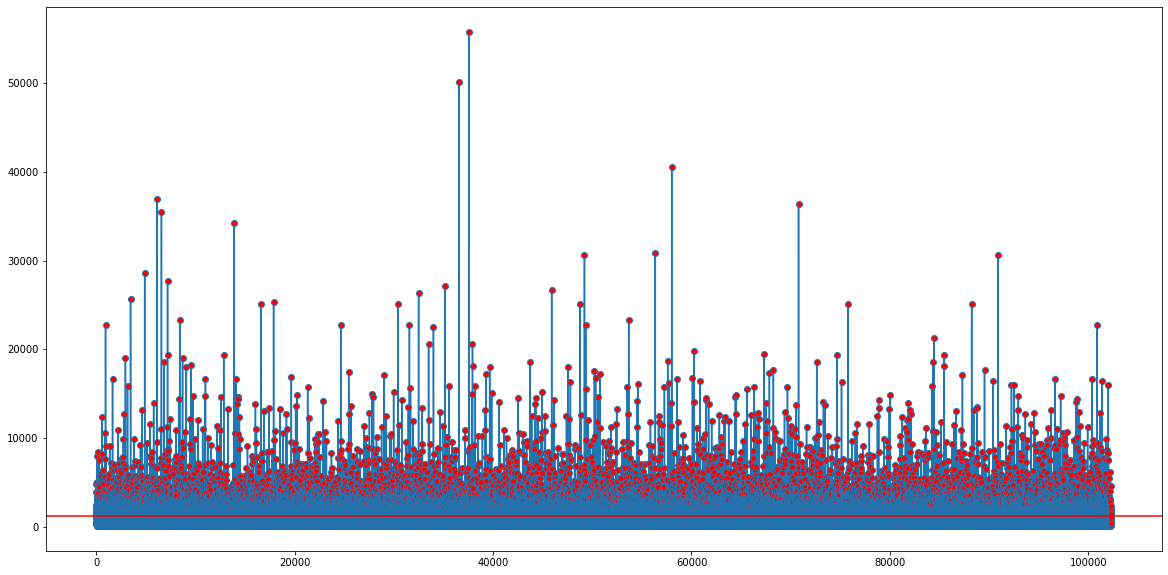

In [42]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(train['char_length'].tolist(),marker='o',markerfacecolor='red')
plt.axhline(y=np.mean(train['char_length'].tolist()),color="red")

In [43]:
train[['char_length']].describe()

,char_length
count,102277.000000
mean,1177.100159
std,1348.431565
min,50.000000
25%,497.000000
50%,842.000000
75%,1408.000000
max,55804.000000


## 统计词的数量

In [0]:
train_word_list = []
for line in train['word_seg'].to_list():
  w = line.split(" ")
  train_word_list.extend(w)

In [0]:
from collections import Counter

In [0]:
count_word = pd.Series(Counter(train_word_list)).sort_values(ascending=False)

In [47]:
count_word.head()

520477     5290340
816903     4063036
1033823    3358597
995362     2025883
920327     1028550
dtype: int64

总共有多少词

In [48]:
count_word.count()

875129

In [49]:
count_word.head(10)

520477     5290340
816903     4063036
1033823    3358597
995362     2025883
920327     1028550
834740      721943
460600      669308
54111       646855
1226448     533532
1025743     421777
dtype: int64

In [50]:
count_word[count_word<3].count()

529805

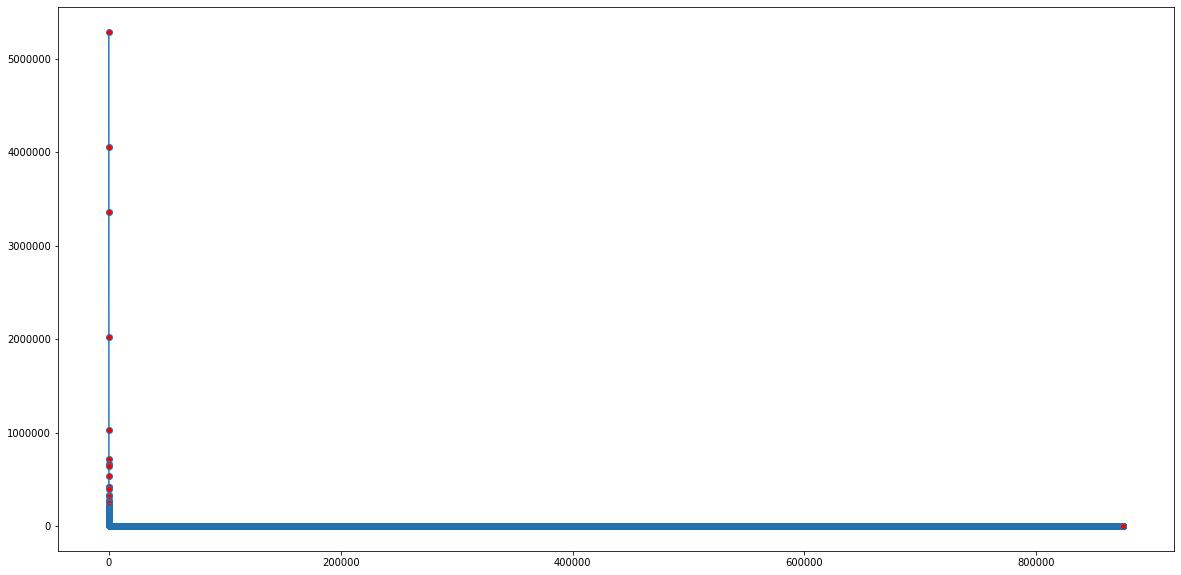

In [51]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(count_word.tolist(),marker='o',markerfacecolor='red')


Text(0.5, 1.0, 'Frequency of Word <100')

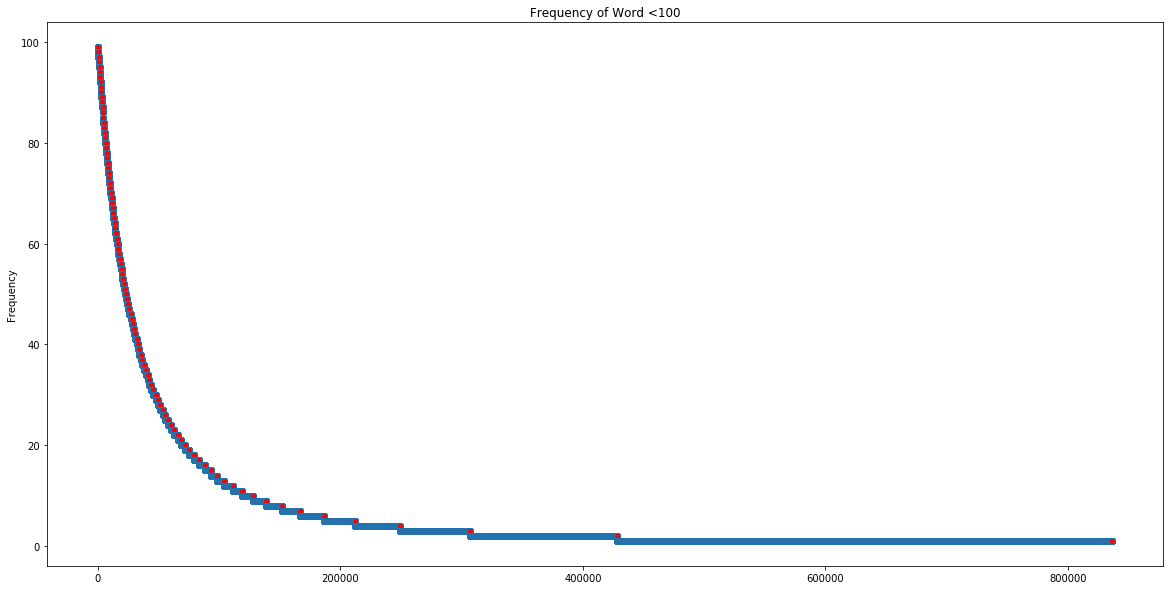

In [52]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(count_word[count_word<100].tolist(),marker='o',markerfacecolor='red')
plt.ylabel("Frequency")
plt.title("Frequency of Word <100")

## 统计字的数量

In [0]:
train_char_list = []
for line in train['article'].to_list():
  w = line.split(" ")
  train_char_list.extend(w)

In [0]:
count_char = pd.Series(Counter(train_char_list)).sort_values(ascending=False)

In [55]:
#字的总数
count_char.count()

13516

In [56]:
#字的top 20
count_char.head(20)

1044285    5290340
7368       4063036
856005     3437550
72195      2025883
195449     1249736
359838     1179852
239755     1028550
427848      950408
316564      853835
1077049     847268
7792        818752
837240      798884
581131      650586
1030656     616991
1220011     583008
968221      553471
79747       533532
266913      527138
474675      526307
222667      497632
dtype: int64

In [57]:
count_char.tail(10)

1192398    1
353297     1
596510     1
1218481    1
803814     1
457423     1
937025     1
981236     1
888075     1
61436      1
dtype: int64

Text(0.5, 1.0, 'Frequency of Char <100')

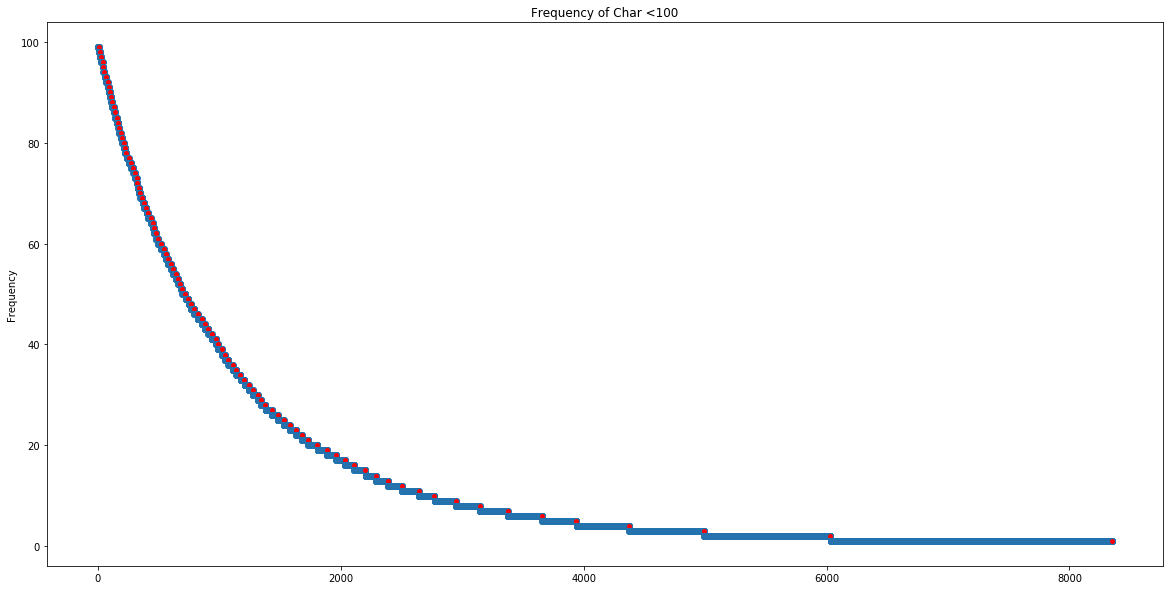

In [58]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(count_char[count_char<100].tolist(),marker='o',markerfacecolor='red')
plt.ylabel("Frequency")
plt.title("Frequency of Char <100")

## 标签分布

In [0]:
count_class = train['class'].value_counts()

In [60]:
count_class

3     8313
13    7907
9     7675
15    7511
18    7066
8     6972
6     6888
14    6740
19    5524
1     5375
12    5326
10    4963
4     3824
11    3571
16    3220
17    3094
7     3038
2     2901
5     2369
Name: class, dtype: int64

Text(0.5, 0, 'class')

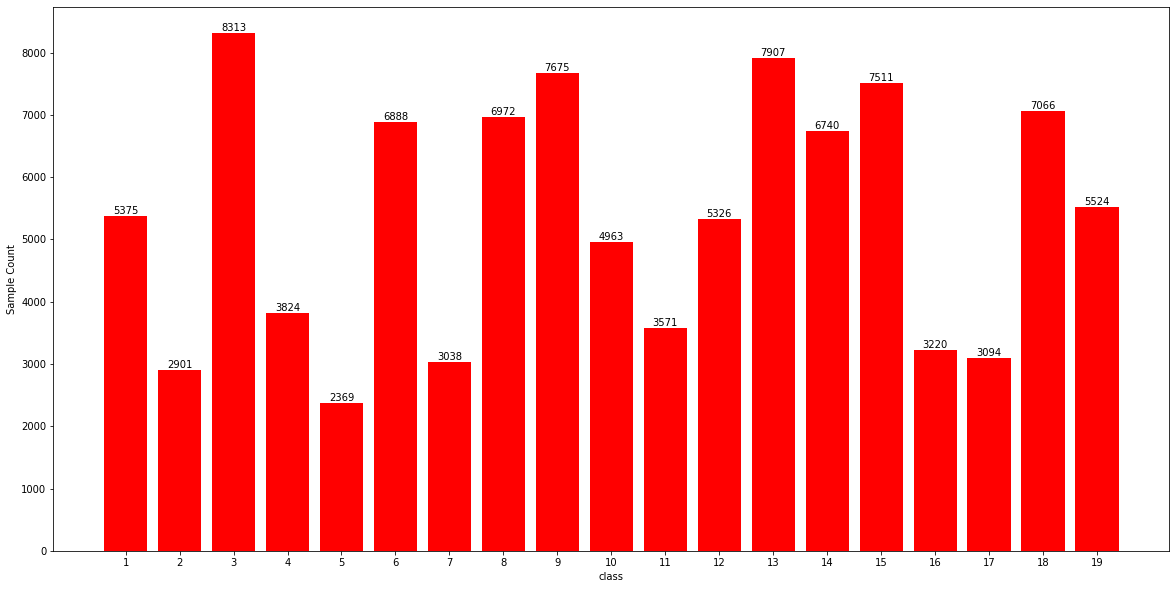

In [61]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
class_bar = plt.bar(x=count_class.index, height=count_class.tolist(),width=0.8,color='red')
# plt.ylabel("Frequency")
# plt.title("Frequency of Char <100")
for bar in class_bar:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height+1, str(height), ha="center", va="bottom")
plt.xticks(count_class.index)
plt.ylabel("Sample Count")
plt.xlabel("class")

###  长文本问题
###  不平衡问题
### 词是非常多的